# 0.0 IMPORTS

In [1]:
# Imports
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn           as sns

## 0.1 Helper Functions

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

pandas : 1.4.3
seaborn: 0.11.2



In [5]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [6]:
# Notação Científica
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [8]:
# jupyter_settings()

## LOADING DATA

In [9]:
# Dataset de escolas
dados_escolas = pd.read_csv("dados/dataset_escolas.csv")

In [10]:
# Shape
dados_escolas.shape

(15, 5)

In [11]:
# Visualiza
dados_escolas.head()

,ID_Escola,Nome_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Escola A,Publica,2917,1910635
1,1,Escola B,Publica,2949,1884411
2,2,Escola C,Particular,1761,1056600
3,3,Escola D,Publica,4635,3022020
4,4,Escola E,Particular,1468,917500


In [12]:
# Dataset de estudantes
dados_estudantes = pd.read_csv("dados/dataset_estudantes.csv")

In [13]:
# Shape
dados_estudantes.shape

(39160, 7)

In [14]:
# Visualiza
dados_estudantes.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica
0,0,Kevin Bradley,M,6,Escola A,66,79
1,1,Paul Smith,M,9,Escola A,94,61
2,2,John Rodriguez,M,9,Escola A,90,60
3,3,Oliver Scott,M,9,Escola A,67,58
4,4,William Ray,F,6,Escola A,97,84


In [15]:
# Merge (Combina) os datasets: pela coluna Nome_Escola
dados_full = pd.merge(dados_estudantes, dados_escolas, how = "left", on = ["Nome_Escola", "Nome_Escola"])

In [16]:
# Shape
dados_full.shape

(39160, 11)

In [17]:
# Visualiza
dados_full.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79,0,Publica,2917,1910635
1,1,Paul Smith,M,9,Escola A,94,61,0,Publica,2917,1910635
2,2,John Rodriguez,M,9,Escola A,90,60,0,Publica,2917,1910635
3,3,Oliver Scott,M,9,Escola A,67,58,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635


## Answering some business questions

> **1- Temos dados de quantas escolas?**

In [18]:
# Total de escolas únicas: 
total_escolas = len(dados_full["Nome_Escola"].unique())
total_escolas

15

In [19]:
print('Total de escolas no dataset : {}'.format(total_escolas))

Total de escolas no dataset : 15


> **2- Qual o total de registros de estudantes na base de dados?**

In [20]:
total_estudantes = dados_full["ID_Estudante"].count()
total_estudantes

39160

In [21]:
print('Total de estudantes no dataset : {}'.format(total_estudantes))

Total de estudantes no dataset : 39160


> **3- Qual o orçamento total considerando todas as escolas?**

In [22]:
total_orc = dados_escolas["Orcamento_Anual"].sum()
total_orc

24649428

In [23]:
print('Orçamento Total de todas as escolas do dataset :${}'.format(total_orc))

Orçamento Total de todas as escolas do dataset :$24649428


> **4- Qual a média da nota dos alunos em Redação?**

In [24]:
media_redacao = dados_full["Nota_Redacao"].mean()
media_redacao

81.87574055158325

In [25]:
print('Média das nostas dos alunos em redação :{}'.format(media_redacao))

Média das nostas dos alunos em redação :81.87574055158325


> **5- Qual a média da nota dos alunos em Matemática?**

In [26]:
media_matematica = dados_full["Nota_Matematica"].mean()
media_matematica

78.98493360572012

In [27]:
print('Média das nostas dos alunos em matemática :{}'.format(media_matematica))

Média das nostas dos alunos em matemática :78.98493360572012


> **6- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Redação? (Entregue o resultado em valor absoluto e percentual)**

In [28]:
contagem_aprovados_red = dados_full[(dados_full["Nota_Redacao"] >= 70)].count()["Nome_Estudante"]
contagem_aprovados_red

33600

In [29]:
percentual_aprovados_red = contagem_aprovados_red / float(total_estudantes) * 100
percentual_aprovados_red

85.80183861082737

In [30]:
print(' Temos um total de aprovação de  :{}%'.format(percentual_aprovados_red))

 Temos um total de aprovação de  :85.80183861082737%


> **7- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Matemática? (Entregue o resultado em valor absoluto e percentual)**

In [31]:
contagem_aprovados_mat = dados_full[(dados_full["Nota_Matematica"] >= 70)].count()["Nome_Estudante"]
contagem_aprovados_mat

29360

In [32]:
percentual_aprovados_mat = contagem_aprovados_mat / float(total_estudantes) * 100
percentual_aprovados_mat

74.97446373850867

In [33]:
print(' Temos um total de aprovação de  :{}%'.format(percentual_aprovados_mat))

 Temos um total de aprovação de  :74.97446373850867%


> **8- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Matemática e Redação? (Entregue o resultado em valor absoluto e percentual)**

In [34]:
contagem_total_aprovados = dados_full[(dados_full["Nota_Matematica"] >= 70) 
                                                  & (dados_full["Nota_Redacao"] >= 70)].count()["Nome_Estudante"]
contagem_total_aprovados

25518

In [35]:
print(' Total de alunos que conseguiram aprovação em ambas disciplinas  :{}'.format(contagem_total_aprovados))

 Total de alunos que conseguiram aprovação em ambas disciplinas  :25518


In [36]:
percentual_aprovados_total = contagem_total_aprovados /  float(total_estudantes) * 100
percentual_aprovados_total

65.16343207354444

In [37]:
print(' Temos um total de aprovação em ambas as disciplinas de  :{}%'.format(percentual_aprovados_total))

 Temos um total de aprovação em ambas as disciplinas de  :65.16343207354444%


> **9- Crie um dataframe com os resultados das questões de 1 a 8 que você calculou acima. (Dica: crie um dicionário e depois converta em dataframe do Pandas)**

In [38]:
df_performance_escolar = pd.DataFrame({"Total de Escolas": [total_escolas], 
                                       "Total de Estudantes": [total_estudantes], 
                                       "Total Orçamento": [total_orc],
                                       "Nota Média em Redação": [media_redacao], 
                                       "Nota Média em Matemática": [media_matematica],
                                       "% Aprovação Redação": [percentual_aprovados_red],
                                       "% Aprovação Matemática": [percentual_aprovados_mat],
                                       "% Aprovação Total": [percentual_aprovados_total]})

In [39]:
df_performance_escolar

,Total de Escolas,Total de Estudantes,Total Orçamento,Nota Média em Redação,Nota Média em Matemática,% Aprovação Redação,% Aprovação Matemática,% Aprovação Total
0,15,39160,24649428,81.88,78.98,85.80,74.97,65.16


In [40]:
type(df_performance_escolar)

pandas.core.frame.DataFrame

> **10- Formate as colunas "Total de Estudantes" e "Total Orçamento" ajustando as casas decimais.**

In [41]:
df_performance_escolar["Total de Estudantes"] = df_performance_escolar["Total de Estudantes"].map("{:,}".format)
df_performance_escolar["Total Orçamento"] = df_performance_escolar["Total Orçamento"].map("${:,.2f}".format)

In [42]:
df_performance_escolar

,Total de Escolas,Total de Estudantes,Total Orçamento,Nota Média em Redação,Nota Média em Matemática,% Aprovação Redação,% Aprovação Matemática,% Aprovação Total
0,15,"39,160","$24,649,428.00",81.88,78.98,85.80,74.97,65.16


## Exploratory data analysis

**1- Entre os alunos aprovados em Redação, qual gênero obteve maior número de aprovações?**

In [43]:
# Filtragem pela condição: >= 70
# Filtragem pela categoria:  (coluna) genero
# operação: value_counts (conta por categoria)
aprovados_por_genero_red = dados_full[(dados_full["Nota_Redacao"] >= 70)]["Genero"].value_counts()
aprovados_por_genero_red

F    17027
M    16573
Name: Genero, dtype: int64

**2- Entre os alunos aprovados em Matemática, qual gênero obteve maior número de aprovações?**

In [44]:
aprovados_por_genero_mat = dados_full[(dados_full["Nota_Matematica"] >= 70)]["Genero"].value_counts()
aprovados_por_genero_mat

F    14835
M    14525
Name: Genero, dtype: int64

**3- Quais os tipos de todas as escolas em nossa base de dados?**

In [45]:
dados_escolas["Tipo_Escola"].value_counts()

Particular    8
Publica       7
Name: Tipo_Escola, dtype: int64

In [46]:
# setindex: colocando as coluna Nome_Escola como indice
# ordenação pela coluna Tipo_Escola
tipos_escolas = dados_escolas.set_index(["Nome_Escola"])["Tipo_Escola"].sort_values()
tipos_escolas

Nome_Escola
Escola C    Particular
Escola E    Particular
Escola F    Particular
Escola G    Particular
Escola I    Particular
Escola J    Particular
Escola K    Particular
Escola O    Particular
Escola A       Publica
Escola B       Publica
Escola D       Publica
Escola H       Publica
Escola L       Publica
Escola M       Publica
Escola N       Publica
Name: Tipo_Escola, dtype: object

**4- Qual o total de estudantes por escola?**

In [47]:
total_estudantes_escola = dados_full["Nome_Escola"].value_counts().sort_values()
total_estudantes_escola

Escola I     427
Escola J     962
Escola E    1468
Escola O    1625
Escola C    1761
Escola K    1800
Escola G    1858
Escola F    2283
Escola N    2739
Escola A    2917
Escola B    2949
Escola L    3999
Escola D    4635
Escola M    4761
Escola H    4976
Name: Nome_Escola, dtype: int64

**5- Qual o total de orçamento de cada escola per capita (por estudante)?**

In [48]:
# Agrupando por Nome_Escola
# Aplicando a média na coluna Orcamento_Anual
# Ordenamos_ sort_values
orc_escola = dados_full.groupby(["Nome_Escola"]).mean()["Orcamento_Anual"].sort_values()
orc_escola

Nome_Escola
Escola I    248087.00
Escola J    585858.00
Escola E    917500.00
Escola O   1043130.00
Escola K   1049400.00
Escola C   1056600.00
Escola G   1081356.00
Escola F   1319574.00
Escola N   1763916.00
Escola B   1884411.00
Escola A   1910635.00
Escola L   2547363.00
Escola D   3022020.00
Escola M   3094650.00
Escola H   3124928.00
Name: Orcamento_Anual, dtype: float64

In [49]:
orc_escola_percapita = (orc_escola / total_estudantes_escola).sort_values()
orc_escola_percapita

Escola F   578.00
Escola I   581.00
Escola G   582.00
Escola K   583.00
Escola C   600.00
Escola J   609.00
Escola E   625.00
Escola H   628.00
Escola L   637.00
Escola B   639.00
Escola O   641.93
Escola N   644.00
Escola M   650.00
Escola D   652.00
Escola A   655.00
dtype: float64

In [50]:
dados_full.columns

Index(['ID_Estudante', 'Nome_Estudante', 'Genero', 'Serie', 'Nome_Escola',
       'Nota_Redacao', 'Nota_Matematica', 'ID_Escola', 'Tipo_Escola',
       'Numero_Alunos', 'Orcamento_Anual'],
      dtype='object')

**6- Qual a nota média dos alunos em Redação para cada escola?**

Insigth: 

    - A escola H que possui o maior orçamento não se encontra entre as escolas com maior  nota em redação

In [51]:
media_escola_red = dados_full.groupby(["Nome_Escola"]).mean()["Nota_Redacao"].sort_values()
media_escola_red

Nome_Escola
Escola L   80.74
Escola N   80.75
Escola D   80.93
Escola M   80.97
Escola H   81.03
Escola B   81.16
Escola A   81.18
Escola C   83.73
Escola O   83.81
Escola I   83.81
Escola E   83.82
Escola K   83.95
Escola G   83.98
Escola F   83.99
Escola J   84.04
Name: Nota_Redacao, dtype: float64

**7- Qual a nota média dos alunos em Matemática para cada escola?**

**6- Qual a nota média dos alunos em Redação para cada escola?**

> Insigth: 

    A escola H que possui o maior orçamento não se encontra entre as escolas com maior  nota em matemática
    A escoa I que possui o menor orçamento está entre as escolas com maior nota em matemática

In [52]:
media_escola_mat = dados_full.groupby(["Nome_Escola"]).mean()["Nota_Matematica"].sort_values()
media_escola_mat

Nome_Escola
Escola A   76.63
Escola B   76.71
Escola L   76.84
Escola H   77.05
Escola M   77.07
Escola N   77.10
Escola D   77.29
Escola G   83.06
Escola F   83.27
Escola E   83.35
Escola C   83.36
Escola O   83.44
Escola K   83.68
Escola I   83.80
Escola J   83.84
Name: Nota_Matematica, dtype: float64

In [53]:
dados_full.columns

Index(['ID_Estudante', 'Nome_Estudante', 'Genero', 'Serie', 'Nome_Escola',
       'Nota_Redacao', 'Nota_Matematica', 'ID_Escola', 'Tipo_Escola',
       'Numero_Alunos', 'Orcamento_Anual'],
      dtype='object')

**8- Considerando somente os alunos aprovados em Redação, qual a média de alunos aprovados por escola?**

In [54]:
# 1º: Filtragem dos alunos aprovados em Redação
aprovados_red = dados_full[(dados_full["Nota_Redacao"] >= 70)]
aprovados_red.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
1,1,Paul Smith,M,9,Escola A,94,61,0,Publica,2917,1910635
2,2,John Rodriguez,M,9,Escola A,90,60,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635
5,5,James Miranda,M,6,Escola A,94,94,0,Publica,2917,1910635
6,6,Benjamin Carter,F,8,Escola A,82,80,0,Publica,2917,1910635


In [55]:
# 2º: Calculando a média da nota em Redação por escola considerando os **aprovados em Redação**
media_apr_red_esc = (aprovados_red.groupby(["Nome_Escola"]).count()["Nome_Estudante"] / total_estudantes_escola * 100).sort_values()
media_apr_red_esc

Escola N   79.30
Escola L   80.22
Escola B   80.74
Escola D   80.86
Escola M   81.22
Escola A   81.32
Escola H   81.93
Escola C   95.85
Escola J   95.95
Escola I   96.25
Escola F   96.54
Escola K   96.61
Escola G   97.04
Escola E   97.14
Escola O   97.29
dtype: float64

**9- Considerando somente os alunos aprovados em Matemática, qual a média de alunos aprovados por escola?**

In [56]:
# Alunos aprovados em Matemática
aprovados_mat = dados_full[(dados_full["Nota_Matematica"] >= 70)]
aprovados_mat.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635
5,5,James Miranda,M,6,Escola A,94,94,0,Publica,2917,1910635
6,6,Benjamin Carter,F,8,Escola A,82,80,0,Publica,2917,1910635
8,8,Ethan Roth,M,7,Escola A,95,87,0,Publica,2917,1910635


In [57]:
# Média da nota em Matemática por escola considerando os aprovados em Matemática
media_apr_mat_esc = (aprovados_mat.groupby(["Nome_Escola"]).count()["Nome_Estudante"] / total_estudantes_escola * 100).sort_values()
media_apr_mat_esc

Escola A   65.68
Escola B   65.99
Escola M   66.06
Escola L   66.37
Escola H   66.68
Escola D   66.75
Escola N   68.31
Escola I   92.51
Escola O   93.23
Escola K   93.33
Escola E   93.39
Escola C   93.87
Escola F   93.87
Escola G   94.13
Escola J   94.59
dtype: float64

**10- Considerando alunos aprovados em Matemática e Redação, qual foi a média de alunos aprovados por escola?**

In [58]:
# 1º: gerado subset aprovados em matemática e redação
aprovados_mat_red = dados_full[(dados_full["Nota_Redacao"] >= 70) & (dados_full["Nota_Matematica"] >= 70)]
aprovados_mat_red.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635
5,5,James Miranda,M,6,Escola A,94,94,0,Publica,2917,1910635
6,6,Benjamin Carter,F,8,Escola A,82,80,0,Publica,2917,1910635
8,8,Ethan Roth,M,7,Escola A,95,87,0,Publica,2917,1910635
9,9,Jacob Greene,M,7,Escola A,96,84,0,Publica,2917,1910635


In [59]:
# 2º: 
# Agrupando por Nome_Escola
# Apliaca operação: count por Nome_Estudante / total de estudantes por escola
# Multiplica por 100
# sort_values: ordena
taxa_aprovados_red_mat = (aprovados_mat_red.groupby(["Nome_Escola"]).count()["Nome_Estudante"] / total_estudantes_escola * 100).sort_values()
taxa_aprovados_red_mat

Escola L   52.99
Escola B   53.20
Escola A   53.51
Escola D   53.53
Escola M   53.54
Escola N   54.29
Escola H   54.64
Escola I   89.23
Escola C   89.89
Escola K   90.33
Escola J   90.54
Escola F   90.58
Escola E   90.60
Escola O   90.89
Escola G   91.33
dtype: float64

Vamos construir um dataframe de resumo com as métricas anteriores.

In [60]:
df_resumo_performance_escolar = pd.DataFrame({"Tipo Escola": tipos_escolas,
                                              "Total Estudantes": total_estudantes_escola,
                                              "Total Orçamento": orc_escola,
                                              "Orçamento Por Estudante": orc_escola_percapita,
                                              "Nota Média Aprovação Redação": media_escola_red,
                                              "Nota Média Aprovação Matemática": media_escola_mat,
                                              "% Aprovados Redação": media_apr_red_esc,
                                              "% Aprovados Matemática": media_apr_mat_esc,
                                              "% Geral Aprovados": taxa_aprovados_red_mat})

In [61]:
df_resumo_performance_escolar

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Escola A,Publica,2917,1910635.00,655.00,81.18,76.63,81.32,65.68,53.51
Escola B,Publica,2949,1884411.00,639.00,81.16,76.71,80.74,65.99,53.20
Escola C,Particular,1761,1056600.00,600.00,83.73,83.36,95.85,93.87,89.89
Escola D,Publica,4635,3022020.00,652.00,80.93,77.29,80.86,66.75,53.53
Escola E,Particular,1468,917500.00,625.00,83.82,83.35,97.14,93.39,90.60
Escola F,Particular,2283,1319574.00,578.00,83.99,83.27,96.54,93.87,90.58
Escola G,Particular,1858,1081356.00,582.00,83.98,83.06,97.04,94.13,91.33
Escola H,Publica,4976,3124928.00,628.00,81.03,77.05,81.93,66.68,54.64
Escola I,Particular,427,248087.00,581.00,83.81,83.80,96.25,92.51,89.23
Escola J,Particular,962,585858.00,609.00,84.04,83.84,95.95,94.59,90.54


> Formatamos algumas colunas.

In [62]:
df_resumo_performance_escolar["Total Orçamento"] = df_resumo_performance_escolar["Total Orçamento"].map("${:,.2f}".format)
df_resumo_performance_escolar["Orçamento Por Estudante"] = df_resumo_performance_escolar["Orçamento Por Estudante"].map("${:,.2f}".format)


In [63]:
df_resumo_performance_escolar

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Escola A,Publica,2917,"$1,910,635.00",$655.00,81.18,76.63,81.32,65.68,53.51
Escola B,Publica,2949,"$1,884,411.00",$639.00,81.16,76.71,80.74,65.99,53.20
Escola C,Particular,1761,"$1,056,600.00",$600.00,83.73,83.36,95.85,93.87,89.89
Escola D,Publica,4635,"$3,022,020.00",$652.00,80.93,77.29,80.86,66.75,53.53
Escola E,Particular,1468,"$917,500.00",$625.00,83.82,83.35,97.14,93.39,90.60
Escola F,Particular,2283,"$1,319,574.00",$578.00,83.99,83.27,96.54,93.87,90.58
Escola G,Particular,1858,"$1,081,356.00",$582.00,83.98,83.06,97.04,94.13,91.33
Escola H,Publica,4976,"$3,124,928.00",$628.00,81.03,77.05,81.93,66.68,54.64
Escola I,Particular,427,"$248,087.00",$581.00,83.81,83.80,96.25,92.51,89.23
Escola J,Particular,962,"$585,858.00",$609.00,84.04,83.84,95.95,94.59,90.54


In [64]:
# Resumo estatístico dos dados
df_resumo_performance_escolar.describe()

,Total Estudantes,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
count,15.00,15.00,15.00,15.00,15.00,15.00
mean,2610.67,82.53,80.43,89.22,80.98,73.27
std,1421.41,1.52,3.38,8.18,14.00,18.99
min,427.00,80.74,76.63,79.30,65.68,52.99
25%,1693.00,81.00,77.06,81.04,66.52,53.53
50%,2283.00,83.73,83.06,95.85,92.51,89.23
75%,3474.00,83.89,83.40,96.58,93.63,90.56
max,4976.00,84.04,83.84,97.29,94.59,91.33


**11-A- Considerando a taxa geral de aprovados, quais as 5 escolas com melhor performance?**

In [65]:
# Ordenando o dataset pela coluna % Geral Aprovados
# maior para menor: Ascending=False
top_escolas = df_resumo_performance_escolar.sort_values(["% Geral Aprovados"], ascending = False)
top_escolas.head(5)

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Escola G,Particular,1858,"$1,081,356.00",$582.00,83.98,83.06,97.04,94.13,91.33
Escola O,Particular,1625,"$1,043,130.00",$641.93,83.81,83.44,97.29,93.23,90.89
Escola E,Particular,1468,"$917,500.00",$625.00,83.82,83.35,97.14,93.39,90.60
Escola F,Particular,2283,"$1,319,574.00",$578.00,83.99,83.27,96.54,93.87,90.58
Escola J,Particular,962,"$585,858.00",$609.00,84.04,83.84,95.95,94.59,90.54


**11-B- Considerando a taxa geral de aprovados, quais as 5 escolas com pior performance?**

In [66]:
# Ordenando o dataset pela coluna % Geral Aprovados
# menor para maior: Ascending= True
top_escolas = df_resumo_performance_escolar.sort_values(["% Geral Aprovados"], ascending = False)
top_escolas.head(5)
bottom_escolas = df_resumo_performance_escolar.sort_values(["% Geral Aprovados"], ascending = True)
bottom_escolas.head(5)

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Escola L,Publica,3999,"$2,547,363.00",$637.00,80.74,76.84,80.22,66.37,52.99
Escola B,Publica,2949,"$1,884,411.00",$639.00,81.16,76.71,80.74,65.99,53.20
Escola A,Publica,2917,"$1,910,635.00",$655.00,81.18,76.63,81.32,65.68,53.51
Escola D,Publica,4635,"$3,022,020.00",$652.00,80.93,77.29,80.86,66.75,53.53
Escola M,Publica,4761,"$3,094,650.00",$650.00,80.97,77.07,81.22,66.06,53.54


In [67]:
dados_full.columns

Index(['ID_Estudante', 'Nome_Estudante', 'Genero', 'Serie', 'Nome_Escola',
       'Nota_Redacao', 'Nota_Matematica', 'ID_Escola', 'Tipo_Escola',
       'Numero_Alunos', 'Orcamento_Anual'],
      dtype='object')

**12- Em cada série, qual escola teve os alunos com melhor performance em Matemática?**

In [68]:
# Criado 4 subset
sexta_serie = dados_full[(dados_full["Serie"] == 6)]
setima_serie = dados_full[(dados_full["Serie"] == 7)]
oitava_serie = dados_full[(dados_full["Serie"] == 8)]
nona_serie = dados_full[(dados_full["Serie"] == 9)]

In [69]:
sexta_serie.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84,0,Publica,2917,1910635
5,5,James Miranda,M,6,Escola A,94,94,0,Publica,2917,1910635
12,12,Sebastian Walker,F,6,Escola A,64,79,0,Publica,2917,1910635
13,13,Mateo Long,M,6,Escola A,71,79,0,Publica,2917,1910635


In [70]:
# Criando novos subsetes: onde estamos agrupando os dados por Nome_Escola e calculando a média para Nota_Matematica
# Para cada um dos subsetes que criamos
notas_sexta_serie = sexta_serie.groupby(["Nome_Escola"]).mean()["Nota_Matematica"]
notas_setima_serie = setima_serie.groupby(["Nome_Escola"]).mean()["Nota_Matematica"]
notas_oitava_serie = oitava_serie.groupby(["Nome_Escola"]).mean()["Nota_Matematica"]
notas_nona_serie = nona_serie.groupby(["Nome_Escola"]).mean()["Nota_Matematica"]

In [71]:
# Criando um data frame com todos os subsetes
notas_por_serie = pd.DataFrame({"Sexta Série": notas_sexta_serie, 
                                "Sétima Série": notas_setima_serie,
                                "Oitava Série": notas_oitava_serie, 
                                "Nona Série": notas_nona_serie})

In [72]:
# Ordenando dataframe por Nome_Escola
notas_por_serie.sort_values(by = "Nome_Escola")

,Sexta Série,Sétima Série,Oitava Série,Nona Série
Nome_Escola,,,,
Escola A,77.03,75.91,76.45,77.23
Escola B,76.40,76.54,76.88,77.15
Escola C,83.42,82.92,83.38,83.78
Escola D,77.44,77.34,77.14,77.19
Escola E,82.04,84.23,83.84,83.36
Escola F,83.09,83.72,83.20,83.04
Escola G,83.09,83.15,82.77,83.28
Escola H,77.08,77.00,77.52,76.49
Escola I,83.79,83.43,85.00,82.86


In [73]:
# Indice de maior valor para a coluna sexta série
notas_por_serie["Sexta Série"].idxmax()

'Escola I'

In [74]:
notas_por_serie["Sétima Série"].idxmax()

'Escola E'

In [75]:
notas_por_serie["Oitava Série"].idxmax()

'Escola I'

In [76]:
notas_por_serie["Nona Série"].idxmax()

'Escola J'

**13- Considerando as faixas de gastos por estudante como sendo: [0, 585, 630, 645, 680], qual faixa resulta em estudantes com melhor performance?**

In [77]:
df_resumo_performance_escolar.columns

Index(['Tipo Escola', 'Total Estudantes', 'Total Orçamento',
       'Orçamento Por Estudante', 'Nota Média Aprovação Redação',
       'Nota Média Aprovação Matemática', '% Aprovados Redação',
       '% Aprovados Matemática', '% Geral Aprovados'],
      dtype='object')

In [78]:
# 1º: fazer a divisão por faixas 
faixas_bins = [0, 585, 630, 645, 680] #valores numericos
labels_faixas = ["<$585", "$585-630", "$630-645", "$645-680"] # valores strings

In [79]:
# # 2º: Criar uma nova coluna no dataset (cut)
# Criando uma nova coluna "Faixa de Gastos por estudante"
# Aplicando os bins e label_faixas criadas acima
df_resumo_performance_escolar["Faixa de Gastos Por Estudante"] = pd.cut(orc_escola_percapita, 
                                                                        faixas_bins, 
                                                                        labels = labels_faixas, 
                                                                        right = False)

In [80]:
df_resumo_performance_escolar

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados,Faixa de Gastos Por Estudante
Escola A,Publica,2917,"$1,910,635.00",$655.00,81.18,76.63,81.32,65.68,53.51,$645-680
Escola B,Publica,2949,"$1,884,411.00",$639.00,81.16,76.71,80.74,65.99,53.20,$630-645
Escola C,Particular,1761,"$1,056,600.00",$600.00,83.73,83.36,95.85,93.87,89.89,$585-630
Escola D,Publica,4635,"$3,022,020.00",$652.00,80.93,77.29,80.86,66.75,53.53,$645-680
Escola E,Particular,1468,"$917,500.00",$625.00,83.82,83.35,97.14,93.39,90.60,$585-630
Escola F,Particular,2283,"$1,319,574.00",$578.00,83.99,83.27,96.54,93.87,90.58,<$585
Escola G,Particular,1858,"$1,081,356.00",$582.00,83.98,83.06,97.04,94.13,91.33,<$585
Escola H,Publica,4976,"$3,124,928.00",$628.00,81.03,77.05,81.93,66.68,54.64,$585-630
Escola I,Particular,427,"$248,087.00",$581.00,83.81,83.80,96.25,92.51,89.23,<$585
Escola J,Particular,962,"$585,858.00",$609.00,84.04,83.84,95.95,94.59,90.54,$585-630


In [81]:
df_resumo_performance_escolar.columns

Index(['Tipo Escola', 'Total Estudantes', 'Total Orçamento',
       'Orçamento Por Estudante', 'Nota Média Aprovação Redação',
       'Nota Média Aprovação Matemática', '% Aprovados Redação',
       '% Aprovados Matemática', '% Geral Aprovados',
       'Faixa de Gastos Por Estudante'],
      dtype='object')

In [82]:
# Criando 5 novas subset
# agrupando 
df_13_1 = df_resumo_performance_escolar.groupby(["Faixa de Gastos Por Estudante"]).mean()["Nota Média Aprovação Redação"]
df_13_2 = df_resumo_performance_escolar.groupby(["Faixa de Gastos Por Estudante"]).mean()["Nota Média Aprovação Matemática"]
df_13_3 = df_resumo_performance_escolar.groupby(["Faixa de Gastos Por Estudante"]).mean()["% Aprovados Redação"]
df_13_4 = df_resumo_performance_escolar.groupby(["Faixa de Gastos Por Estudante"]).mean()["% Aprovados Matemática"]
df_13_5 = df_resumo_performance_escolar.groupby(["Faixa de Gastos Por Estudante"]).mean()["% Geral Aprovados"]

In [83]:
# Criando um dataframe
df_performance_gastos = pd.DataFrame({"Média Redação" : df_13_1.round(2),
                                      "Média Matemática": df_13_2.round(2),
                                      "% Aprovados Redação": df_13_3.round(2),
                                      "% Aprovados Matemática": df_13_4.round(2),
                                      "% Geral Aprovados": df_13_5.round(2)})

> Insigth:
    
    As escolas com menor faixa de gasto por estudante tiveram o maior % geral de aprovados;
    

In [84]:
df_performance_gastos

,Média Redação,Média Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Faixa de Gastos Por Estudante,,,,,
<$585,83.93,83.46,96.61,93.46,90.37
$585-630,83.16,81.90,92.72,87.13,81.42
$630-645,81.61,78.52,84.39,73.47,62.84
$645-680,81.03,77.00,81.13,66.16,53.53


**14- Considerando as faixas de tamanho (número de alunos) das escolas como sendo: [0, 1000, 2000, 5000], qual faixa resulta em estudantes com melhor performance?**

In [85]:
df_resumo_performance_escolar.columns

Index(['Tipo Escola', 'Total Estudantes', 'Total Orçamento',
       'Orçamento Por Estudante', 'Nota Média Aprovação Redação',
       'Nota Média Aprovação Matemática', '% Aprovados Redação',
       '% Aprovados Matemática', '% Geral Aprovados',
       'Faixa de Gastos Por Estudante'],
      dtype='object')

In [86]:
# 1º: fazer a divisão por faixas 
tamanho_bins = [0, 1000, 2000, 5000] # valores númericos
labels_tamanhos = ["Pequeno Porte (<1000)", "Médio Porte (1000-2000)", "Grande Porte (2000-5000)"] # valores strings

In [87]:
# Criar uma nova coluna Tamanho Escola
# aplicando as faixas na coluna Total estudantes
df_resumo_performance_escolar["Tamanho Escola"] = pd.cut(df_resumo_performance_escolar["Total Estudantes"], 
                                                         tamanho_bins, 
                                                         labels = labels_tamanhos, 
                                                         right = False)

In [88]:
df_resumo_performance_escolar

,Tipo Escola,Total Estudantes,Total Orçamento,Orçamento Por Estudante,Nota Média Aprovação Redação,Nota Média Aprovação Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados,Faixa de Gastos Por Estudante,Tamanho Escola
Escola A,Publica,2917,"$1,910,635.00",$655.00,81.18,76.63,81.32,65.68,53.51,$645-680,Grande Porte (2000-5000)
Escola B,Publica,2949,"$1,884,411.00",$639.00,81.16,76.71,80.74,65.99,53.20,$630-645,Grande Porte (2000-5000)
Escola C,Particular,1761,"$1,056,600.00",$600.00,83.73,83.36,95.85,93.87,89.89,$585-630,Médio Porte (1000-2000)
Escola D,Publica,4635,"$3,022,020.00",$652.00,80.93,77.29,80.86,66.75,53.53,$645-680,Grande Porte (2000-5000)
Escola E,Particular,1468,"$917,500.00",$625.00,83.82,83.35,97.14,93.39,90.60,$585-630,Médio Porte (1000-2000)
Escola F,Particular,2283,"$1,319,574.00",$578.00,83.99,83.27,96.54,93.87,90.58,<$585,Grande Porte (2000-5000)
Escola G,Particular,1858,"$1,081,356.00",$582.00,83.98,83.06,97.04,94.13,91.33,<$585,Médio Porte (1000-2000)
Escola H,Publica,4976,"$3,124,928.00",$628.00,81.03,77.05,81.93,66.68,54.64,$585-630,Grande Porte (2000-5000)
Escola I,Particular,427,"$248,087.00",$581.00,83.81,83.80,96.25,92.51,89.23,<$585,Pequeno Porte (<1000)
Escola J,Particular,962,"$585,858.00",$609.00,84.04,83.84,95.95,94.59,90.54,$585-630,Pequeno Porte (<1000)


In [89]:
# Calcular a média das metricas fazendo o agrupamento pela nova coluna que criamos
df_14_1 = df_resumo_performance_escolar.groupby(["Tamanho Escola"]).mean()["Nota Média Aprovação Redação"]
df_14_2 = df_resumo_performance_escolar.groupby(["Tamanho Escola"]).mean()["Nota Média Aprovação Matemática"]
df_14_3 = df_resumo_performance_escolar.groupby(["Tamanho Escola"]).mean()["% Aprovados Redação"]
df_14_4 = df_resumo_performance_escolar.groupby(["Tamanho Escola"]).mean()["% Aprovados Matemática"]
df_14_5 = df_resumo_performance_escolar.groupby(["Tamanho Escola"]).mean()["% Geral Aprovados"]

In [90]:
# Criando novo dataframe
df_performance_tamanho = pd.DataFrame({"Média Redação" : df_14_1.round(2),
                                       "Média Matemática": df_14_2.round(2),
                                       "% Aprovados Redação": df_14_3.round(2),
                                       "% Aprovados Matemática": df_14_4.round(2),
                                       "% Geral Aprovados": df_14_5.round(2)})

array([[<AxesSubplot:title={'center':'Média Redação'}>,
        <AxesSubplot:title={'center':'Média Matemática'}>],
       [<AxesSubplot:title={'center':'% Aprovados Redação'}>,
        <AxesSubplot:title={'center':'% Aprovados Matemática'}>],
       [<AxesSubplot:title={'center':'% Geral Aprovados'}>,
        <AxesSubplot:>]], dtype=object)

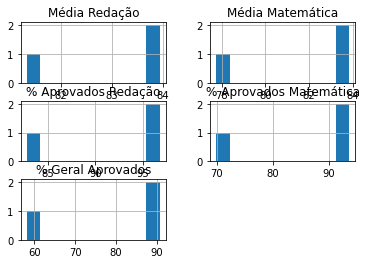

In [91]:
df_performance_tamanho.hist()

> Insigth

    As escolas de pequeno porte tiveram as melhores médias
    
    As escolas de grande porte tiveram as piores médias

**15- Qual o impacto do tipo de escola na performance dos alunos?**

In [92]:
df_resumo_performance_escolar.columns

Index(['Tipo Escola', 'Total Estudantes', 'Total Orçamento',
       'Orçamento Por Estudante', 'Nota Média Aprovação Redação',
       'Nota Média Aprovação Matemática', '% Aprovados Redação',
       '% Aprovados Matemática', '% Geral Aprovados',
       'Faixa de Gastos Por Estudante', 'Tamanho Escola'],
      dtype='object')

In [93]:
# Calculando a média das métricas e agrupando pela coluna Tipo Escola
df_15_1 = df_resumo_performance_escolar.groupby(["Tipo Escola"]).mean()["Nota Média Aprovação Redação"]
df_15_2 = df_resumo_performance_escolar.groupby(["Tipo Escola"]).mean()["Nota Média Aprovação Matemática"]
df_15_3 = df_resumo_performance_escolar.groupby(["Tipo Escola"]).mean()["% Aprovados Redação"]
df_15_4 = df_resumo_performance_escolar.groupby(["Tipo Escola"]).mean()["% Aprovados Matemática"]
df_15_5 = df_resumo_performance_escolar.groupby(["Tipo Escola"]).mean()["% Geral Aprovados"]

In [94]:
# Criando novo dataframe
df_performance_tipo_escola = pd.DataFrame({"Média Redação": df_15_1.round(2),
                                           "Média Matemática": df_15_2.round(2),
                                           "% Aprovados Redação": df_15_3.round(2),
                                           "% Aprovados Matemática": df_15_4.round(2),
                                           "% Geral Aprovados": df_15_5.round(2)})

In [95]:
df_performance_tipo_escola

,Média Redação,Média Matemática,% Aprovados Redação,% Aprovados Matemática,% Geral Aprovados
Tipo Escola,,,,,
Particular,83.89,83.48,96.58,93.62,90.43
Publica,80.97,76.96,80.80,66.55,53.67


array([[<AxesSubplot:title={'center':'Média Redação'}>,
        <AxesSubplot:title={'center':'Média Matemática'}>],
       [<AxesSubplot:title={'center':'% Aprovados Redação'}>,
        <AxesSubplot:title={'center':'% Aprovados Matemática'}>],
       [<AxesSubplot:title={'center':'% Geral Aprovados'}>,
        <AxesSubplot:>]], dtype=object)

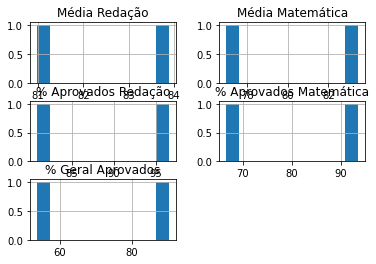

In [96]:
df_performance_tipo_escola.hist()

In [97]:
df_resumo_performance_escolar.to_excel('dados/df_resumo_performance_escolar.xlsx')